<a href="https://colab.research.google.com/github/Tanishqk96/Agentic-ai/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
data = {
    'CGPA': [6.5, 7.0, 7.5, 8.0, 8.2, 8.5, 8.8, 9.0, 9.2, 9.5],
    'Package_LPA': [3.0, 3.5, 4.0, 5.0, 5.5, 6.5, 7.0, 8.0, 9.0, 10.0]
}

df = pd.DataFrame(data)
print(df)

   CGPA  Package_LPA
0   6.5          3.0
1   7.0          3.5
2   7.5          4.0
3   8.0          5.0
4   8.2          5.5
5   8.5          6.5
6   8.8          7.0
7   9.0          8.0
8   9.2          9.0
9   9.5         10.0


In [4]:
df = pd.DataFrame(data)

In [6]:
X = df[["CGPA"]]
Y = df[["Package_LPA"]]

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [34]:
x_train , x_test , y_train , y_test = train_test_split(X,Y, test_size=0.2, random_state=44) # order matters

In [14]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [35]:
model.score(x_test ,y_test)

0.9769531618201528

In [50]:
model.predict(pd.DataFrame([[6.5]], columns=['CGPA']))

array([[2.1039644]])

In [51]:
y_pred = model.predict(X)

In [45]:
import matplotlib.pyplot as plt

***SCATTER PLOT***

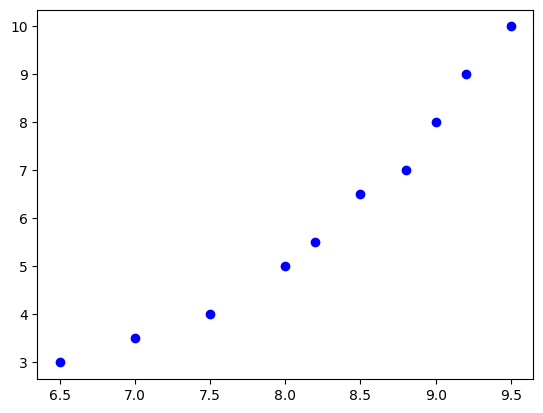

In [46]:
plt.scatter(X, Y, color='blue')       # actual data points

***LINEAR REGRESSION LINE ***

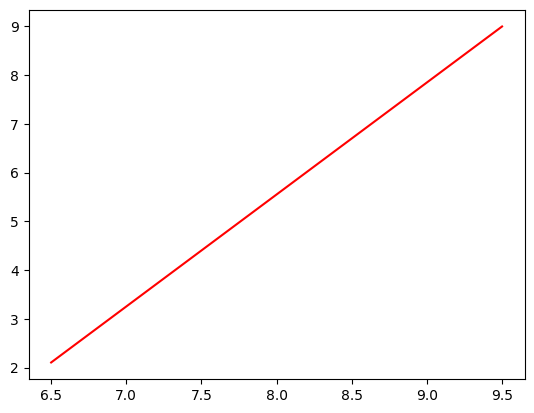

In [52]:
plt.plot(X, y_pred, color='red')

***MULTIPLE REGRESSION.***

In [2]:
import pandas as pd
dataset = pd.read_csv('/content/age_experience_salary.csv')

In [3]:
dataset

,Age,Experience,Salary
0,22,0,25000
1,25,2,32000
2,28,4,40000
3,30,5,45000
4,35,8,60000
5,40,10,75000
6,45,15,95000
7,50,20,120000
8,55,25,135000
9,60,30,150000


In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
from sklearn.model_selection import train_test_split

In [11]:
x=dataset.iloc[:,:-1]
y=dataset["Salary"]

In [13]:
x_train , x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [6]:
lr = LinearRegression()

In [14]:
lr.fit(x_train, y_train)

LinearRegression()

In [15]:
lr.score(x_test, y_test)

0.9994445086503276

In [16]:
import seaborn as sns

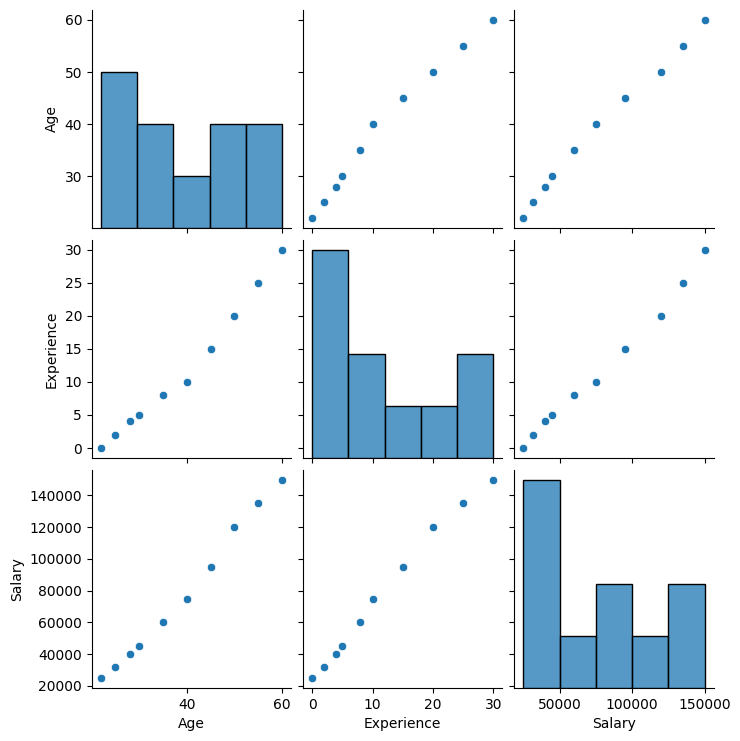

In [17]:
sns.pairplot(data=dataset)

***POLYNOMIAL REGRESSION.***

[     0.         -24741.64724172  12572.84382287  -1820.12432013
    107.80885781]
Predicted Salary for Level 1: ₹16,118.88


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


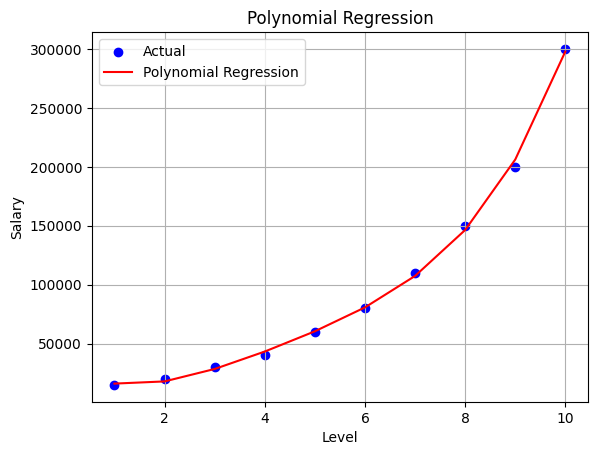

In [33]:
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
# Sample data
data = {
    'Level': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Salary': [15000, 20000, 30000, 40000, 60000, 80000, 110000, 150000, 200000, 300000]
}
df = pd.DataFrame(data)

# Features and target
X = df[['Level']]
y = df['Salary']
# Create polynomial features (degree = 2 or 3 usually works well)
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)
# Train linear regression model on polynomial features
model = LinearRegression()
model.fit(X_poly, y)
# Predict
print(model.coef_)

level_to_predict = 1
y_pred = model.predict(X_poly)
level_poly = poly.transform([[level_to_predict]])  # transform to match polynomial features
predicted_salary = model.predict(level_poly)

print(f"Predicted Salary for Level {level_to_predict}: ₹{predicted_salary[0]:,.2f}")




# Plot results
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, y_pred, color='red', label='Polynomial Regression')
plt.xlabel("Level")
plt.ylabel("Salary")
plt.title("Polynomial Regression")
plt.legend()
plt.grid(True)
plt.show()

***LASSO, RIDGE REGULARIZATION***

In [34]:
data = {
    'Experience': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Salary': [25000, 30000, 35000, 40000, 50000, 60000, 75000, 90000, 105000, 120000]
}

df2 = pd.DataFrame(data)
print(df2)

   Experience  Salary
0           1   25000
1           2   30000
2           3   35000
3           4   40000
4           5   50000
5           6   60000
6           7   75000
7           8   90000
8           9  105000
9          10  120000


In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.metrics import mean_squared_error


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)
print("Linear MSE:", mean_squared_error(y_test, y_pred_lin))


Linear MSE: 295653425.980975


In [38]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
print("Ridge MSE:", mean_squared_error(y_test, y_pred_ridge))


Ridge MSE: 255487490.12496474


In [39]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
print("Lasso MSE:", mean_squared_error(y_test, y_pred_lasso))


Lasso MSE: 295652225.3293221


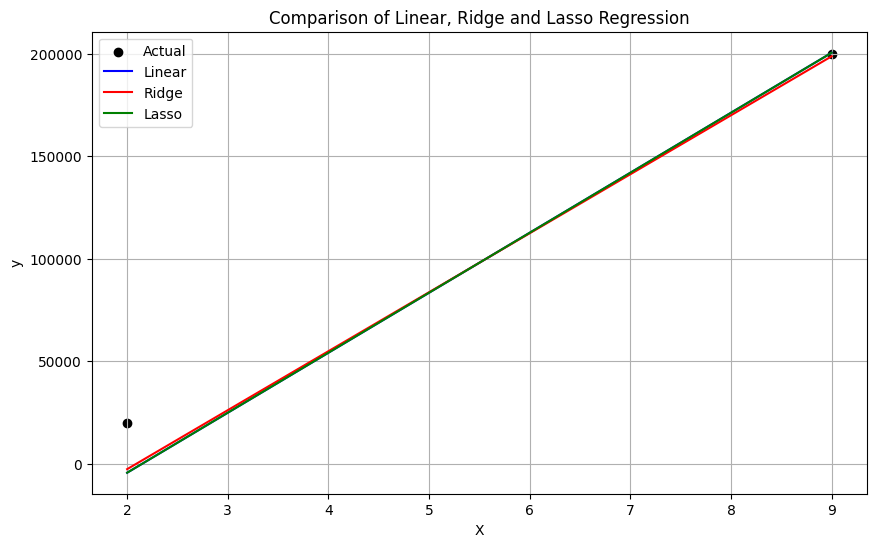

In [40]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='black', label='Actual')

plt.plot(X_test, y_pred_lin, label='Linear', color='blue')
plt.plot(X_test, y_pred_ridge, label='Ridge', color='red')
plt.plot(X_test, y_pred_lasso, label='Lasso', color='green')

plt.legend()
plt.xlabel("X")
plt.ylabel("y")
plt.title("Comparison of Linear, Ridge and Lasso Regression")
plt.grid(True)
plt.show()
